In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
headers = {'User-Agent':'Mozilla/5.0(Windows NT 10.0;Win64;x64) AppleWebKit/537.36(KHTML,like Gecko) Chrome/83.0.4103.116 Safari/537.36'}
url = 'https://www.jumia.co.ke/laptops/'
r = requests.get(url,headers=headers)
soup = BeautifulSoup(r.content,features='lxml')

In [3]:
print(soup.find('title'))
print(soup.find('title').text)

<title>Laptops - Buy Best Laptops Online | Jumia Kenya</title>
Laptops - Buy Best Laptops Online | Jumia Kenya


In [4]:
price = soup.find('div', class_ ="prc").text
print(price)

KSh 27,499


In [5]:
products = soup.find('div', class_="name").text
print(products)


Lenovo Ideapad 3 Intel Celeron N4020 1.1GHZ 4GB 1TB  15.6" DOS Business Black+Antivirus 1 User


In [6]:
info = soup.find('div', class_="info").text
print(info)

HP Refurbished EliteBook 820 , Intel Core I5, 8GB RAM, 500GB HDDKSh 18,999KSh 35,00046%4.3 out of 5(28)


In [7]:
ret = soup.find('div',class_="stars _s").text
print(ret)

4.3 out of 5


In [8]:
old = soup.find('div',class_="old").text
print(old)

KSh 35,000


In [9]:
dis = soup.find('div',class_="bdg _dsct _sm").text
print(dis)

46%


In [10]:
soup.find('div')
data_light = []
pr = soup.find_all('div',class_='itm col')
for i in pr:
    try:
        data = {
   
    'Products':i.find('div', class_="name").text,
    'Price(KSh)':i.find('div',class_ ="prc").text
    }
  
        data_light.append(data)
    except:
        pass
df =pd.DataFrame(data_light)
df

,Products,Price(KSh)
0,Lenovo Ideapad 3 Intel Celeron N4020 1.1GHZ 4G...,"KSh 27,499"
1,Asus E410m Celeron 4gb Ram 128gb Emmc Windows ...,"KSh 29,999"
2,Lenovo IDEAPAD S145-Celeron-1TB HDD-4GB RAM+WI...,"KSh 32,699"
3,"Lenovo 14"" - Intel Celeron - 1TB HDD - 4GB RAM...","KSh 27,999"
4,Apple MacBook Pro 14 Inch With M1 16gb Ram 1Tb...,"KSh 385,999"
5,"HP ProBook X360 11 G2 , Intel Pentium, 4 GB RA...","KSh 17,000"
6,"Lenovo 14"" - Intel Celeron - 1TB HDD - 4GB RAM...","KSh 27,999"
7,HP Refurbished EliteBook 840 G1 Intel Core I5 ...,"KSh 21,995"
8,"Lenovo IDEAPAD S145-Celeron,1TB HDD-4GB RAM+WI...","KSh 33,200"
9,Apple MacBook Pro 14 Inch With M1 Pro Chip (La...,"KSh 310,999"


In [11]:
df['Price(KSh)']=df['Price(KSh)'].str.strip('KSh')
df['Price(KSh)']=df['Price(KSh)'].str.replace(',','')
df['Price(KSh)']=df['Price(KSh)'].astype('float')
df

,Products,Price(KSh)
0,Lenovo Ideapad 3 Intel Celeron N4020 1.1GHZ 4G...,27499.0
1,Asus E410m Celeron 4gb Ram 128gb Emmc Windows ...,29999.0
2,Lenovo IDEAPAD S145-Celeron-1TB HDD-4GB RAM+WI...,32699.0
3,"Lenovo 14"" - Intel Celeron - 1TB HDD - 4GB RAM...",27999.0
4,Apple MacBook Pro 14 Inch With M1 16gb Ram 1Tb...,385999.0
5,"HP ProBook X360 11 G2 , Intel Pentium, 4 GB RA...",17000.0
6,"Lenovo 14"" - Intel Celeron - 1TB HDD - 4GB RAM...",27999.0
7,HP Refurbished EliteBook 840 G1 Intel Core I5 ...,21995.0
8,"Lenovo IDEAPAD S145-Celeron,1TB HDD-4GB RAM+WI...",33200.0
9,Apple MacBook Pro 14 Inch With M1 Pro Chip (La...,310999.0


In [12]:
df.describe()

,Price(KSh)
count,44.000000
mean,39242.613636
std,74571.667575
min,900.000000
25%,11974.000000
50%,22147.000000
75%,28424.000000
max,385999.000000


In [13]:
df[df['Price(KSh)']==df['Price(KSh)'].max()]

,Products,Price(KSh)
4,Apple MacBook Pro 14 Inch With M1 16gb Ram 1Tb...,385999.0


In [14]:
df[df['Price(KSh)']>df['Price(KSh)'].mean()]

,Products,Price(KSh)
4,Apple MacBook Pro 14 Inch With M1 16gb Ram 1Tb...,385999.0
9,Apple MacBook Pro 14 Inch With M1 Pro Chip (La...,310999.0
11,"Apple 13.3"" MacBook Pro M1 Chip 8GB Unified Ra...",195999.0
12,HP Refubised Folio 1030 G2 X360 7th Gen Core I...,67000.0


In [15]:
df[df['Price(KSh)']==df['Price(KSh)'].min()]

,Products,Price(KSh)
39,Generic Laser Pointer - Red Laser Pen - Lazerr...,900.0


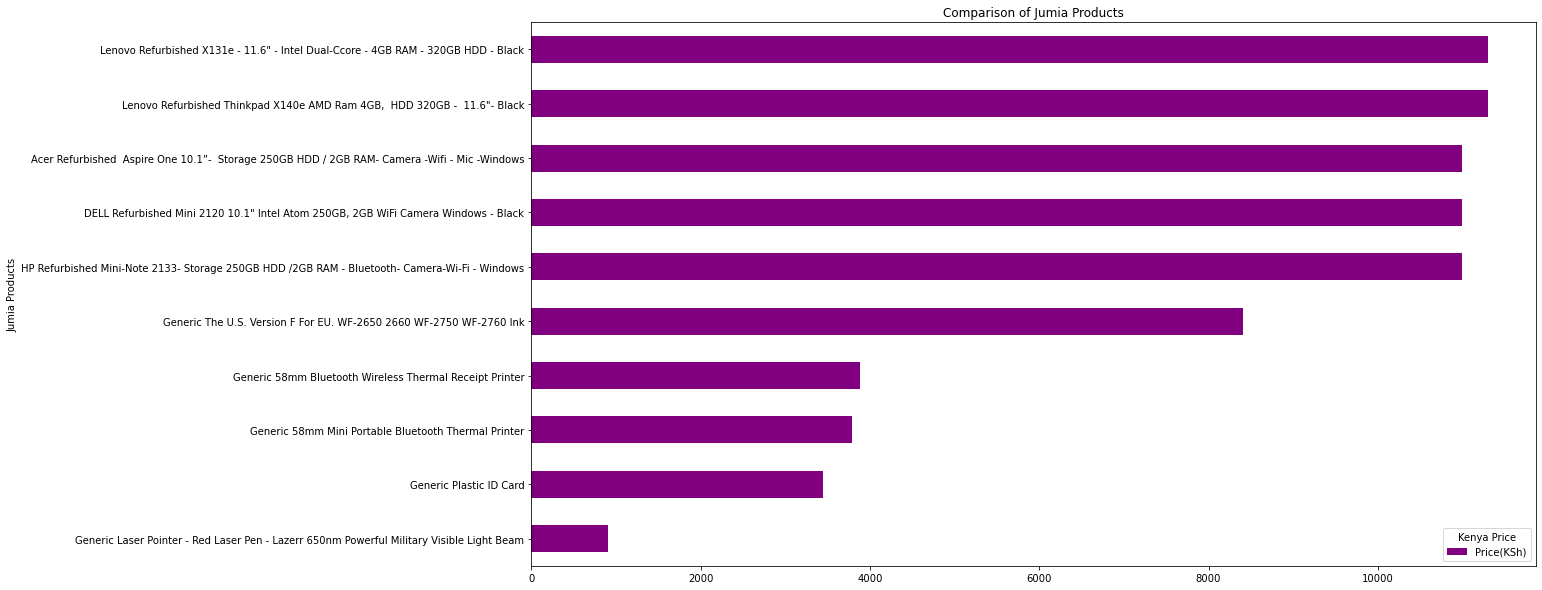

In [16]:
import matplotlib.pyplot as plt
df.set_index('Products').sort_values(by='Price(KSh)').head(10).plot(kind='barh',
                                                           xlabel='Jumia Products',
                                                           title='Comparison of Jumia Products',
                                                           figsize=(18,10),
                                                           color='purple'
                                                            )
plt.legend(loc='best',title='Kenya Price');

# Web Scraping All Data

In [17]:
# step 1
def step_one(x):
    url = 'https://www.jumia.co.ke/home-lighting/'
    r = requests.get(url,headers=headers)
    soup = BeautifulSoup(r.content,features='lxml')
    return soup

In [18]:
#step 2
data_li = []
def parse(soup):
    prb = soup.find_all('div',class_='itm col')
    for ii in prb:
        try:
            dataa = {
            'Products':ii.find('div', class_="name").text,
            'Price(KSh)':ii.find('div',class_ ="prc").text
        }
            data_li.append(dataa)
        except:
            pass 

In [19]:
# step 3 Output
def output():
    dff =pd.DataFrame(data_li )
    return dff

In [20]:
step_one(50)
parse(soup)
output()

,Products,Price(KSh)
0,Lenovo Ideapad 3 Intel Celeron N4020 1.1GHZ 4G...,"KSh 27,499"
1,Asus E410m Celeron 4gb Ram 128gb Emmc Windows ...,"KSh 29,999"
2,Lenovo IDEAPAD S145-Celeron-1TB HDD-4GB RAM+WI...,"KSh 32,699"
3,"Lenovo 14"" - Intel Celeron - 1TB HDD - 4GB RAM...","KSh 27,999"
4,Apple MacBook Pro 14 Inch With M1 16gb Ram 1Tb...,"KSh 385,999"
5,"HP ProBook X360 11 G2 , Intel Pentium, 4 GB RA...","KSh 17,000"
6,"Lenovo 14"" - Intel Celeron - 1TB HDD - 4GB RAM...","KSh 27,999"
7,HP Refurbished EliteBook 840 G1 Intel Core I5 ...,"KSh 21,995"
8,"Lenovo IDEAPAD S145-Celeron,1TB HDD-4GB RAM+WI...","KSh 33,200"
9,Apple MacBook Pro 14 Inch With M1 Pro Chip (La...,"KSh 310,999"


In [21]:
def clean_output(data,col):
    data =pd.DataFrame(data_li)
    col = data['Price(KSh)']
    
    data['Price(KSh)']=data['Price(KSh)'].str.strip('KSh')
    data['Price(KSh)']=data['Price(KSh)'].str.replace(',','')
    data['Price(KSh)']=data['Price(KSh)'].astype('float')
    return data

In [22]:
step_one(100)
parse(soup)
output()

,Products,Price(KSh)
0,Lenovo Ideapad 3 Intel Celeron N4020 1.1GHZ 4G...,"KSh 27,499"
1,Asus E410m Celeron 4gb Ram 128gb Emmc Windows ...,"KSh 29,999"
2,Lenovo IDEAPAD S145-Celeron-1TB HDD-4GB RAM+WI...,"KSh 32,699"
3,"Lenovo 14"" - Intel Celeron - 1TB HDD - 4GB RAM...","KSh 27,999"
4,Apple MacBook Pro 14 Inch With M1 16gb Ram 1Tb...,"KSh 385,999"
...,...,...
83,Generic Laser Pointer - Red Laser Pen - Lazerr...,KSh 900
84,HP 107w A4 Mono Laser Wireless Printer,"KSh 26,500"
85,Epson EcoTank L3250 A4 All-in-One Inkjet Printer,"KSh 29,699"
86,"Canon PIXMA G2420 Printer Scanner Copier, Ink ...","KSh 22,799"


In [23]:
def clean_output(data,col):
    data =pd.DataFrame(data_li)
    col = data['Price(KSh)']
    
    data['Price(KSh)']=data['Price(KSh)'].str.strip('KSh')
    data['Price(KSh)']=data['Price(KSh)'].str.replace(',','')
    data['Price(KSh)']=data['Price(KSh)'].astype('float')
    return data

In [24]:
d =clean_output(df,df.loc[:,'Price(KSh)'])
print(d.shape)
d.head(20)

(88, 2)


,Products,Price(KSh)
0,Lenovo Ideapad 3 Intel Celeron N4020 1.1GHZ 4G...,27499.0
1,Asus E410m Celeron 4gb Ram 128gb Emmc Windows ...,29999.0
2,Lenovo IDEAPAD S145-Celeron-1TB HDD-4GB RAM+WI...,32699.0
3,"Lenovo 14"" - Intel Celeron - 1TB HDD - 4GB RAM...",27999.0
4,Apple MacBook Pro 14 Inch With M1 16gb Ram 1Tb...,385999.0
5,"HP ProBook X360 11 G2 , Intel Pentium, 4 GB RA...",17000.0
6,"Lenovo 14"" - Intel Celeron - 1TB HDD - 4GB RAM...",27999.0
7,HP Refurbished EliteBook 840 G1 Intel Core I5 ...,21995.0
8,"Lenovo IDEAPAD S145-Celeron,1TB HDD-4GB RAM+WI...",33200.0
9,Apple MacBook Pro 14 Inch With M1 Pro Chip (La...,310999.0


In [25]:
d.tail(20)

,Products,Price(KSh)
68,"Lenovo Refurbished Thinkpad X140e AMD Ram 4GB,...",11299.0
69,"Lenovo Refurbished Thinkpad X130e AMD Ram 4GB,...",11999.0
70,HP Refurbished Mini-Note 2133- Storage 250GB H...,10999.0
71,"Lenovo Refurbished Thinkpad X131e 12"" AMD 4GB ...",13502.0
72,"Lenovo Refurbished Thinkpad X140e 12"" AMD 4GB ...",13640.0
73,Epson EcoTank L3210 Ink Tank Printer + 1 Year ...,27840.0
74,"Canon PIXMA G3411-Wirelessly Print, Copy, Scan",27999.0
75,"Canon PIXMA G2411-(Print, Copy, Scan)-Printer",24999.0
76,Generic 58mm Mini Portable Bluetooth Thermal P...,3789.0
77,HP Laser 107a Printer - White,23999.0


In [26]:
print(df['Products'].nunique())

43


In [27]:
pd.DataFrame(df['Products'].unique(),columns=['Unique Products'])

,Unique Products
0,Lenovo Ideapad 3 Intel Celeron N4020 1.1GHZ 4G...
1,Asus E410m Celeron 4gb Ram 128gb Emmc Windows ...
2,Lenovo IDEAPAD S145-Celeron-1TB HDD-4GB RAM+WI...
3,"Lenovo 14"" - Intel Celeron - 1TB HDD - 4GB RAM..."
4,Apple MacBook Pro 14 Inch With M1 16gb Ram 1Tb...
5,"HP ProBook X360 11 G2 , Intel Pentium, 4 GB RA..."
6,"Lenovo 14"" - Intel Celeron - 1TB HDD - 4GB RAM..."
7,HP Refurbished EliteBook 840 G1 Intel Core I5 ...
8,"Lenovo IDEAPAD S145-Celeron,1TB HDD-4GB RAM+WI..."
9,Apple MacBook Pro 14 Inch With M1 Pro Chip (La...


In [28]:
d.describe()

,Price(KSh)
count,88.000000
mean,39242.613636
std,74141.856113
min,900.000000
25%,11974.000000
50%,22147.000000
75%,28424.000000
max,385999.000000


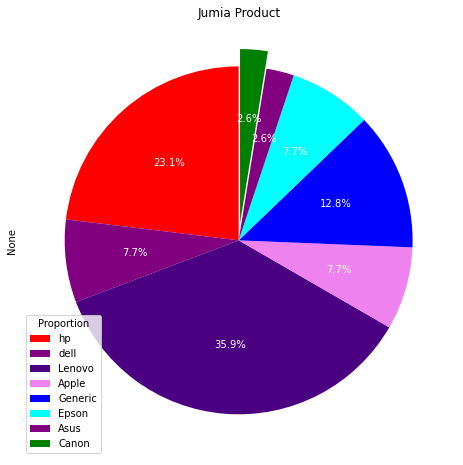

In [29]:
hp=len(df[(df['Products'].str.contains('HP'))] )
dell=len(df[(df['Products'].str.contains('DELL'))] )
Lenovo=len(df[(df['Products'].str.contains('Lenovo'))] )
Apple=len(df[(df['Products'].str.contains('Apple'))] )
Generic=len(df[(df['Products'].str.contains('Generic'))] )
Epson=len(df[(df['Products'].str.contains('Epson'))] )
Asus=len(df[(df['Products'].str.contains('Asus'))] )
Canon =len(df[(df['Products'].str.contains('Asus'))])


#pandas plot
plt.figure(figsize=(16,8))
values=[hp,dell,Lenovo,Apple,Generic,Epson,Asus,Canon]
product=['hp','dell','Lenovo','Apple','Generic','Epson','Asus','Canon']
explode = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1]
color = ['red','purple','indigo','violet','blue','cyan','purple','green']
av =pd.Series(values,product)
av.plot(kind='pie',
        autopct='%.1f%%',
        explode = explode,
        startangle=90,
        pctdistance=0.6,
        colors=color,
        textprops= {'color':'w'},
       title = 'Jumia Product')
plt.legend(loc=3,title='Proportion');

In [30]:
#Printers
printers=(df[(df['Products'].str.contains('Printer'))] )
print(printers)
len(printers)

                                             Products  Price(KSh)
29  Epson EcoTank L3210 Ink Tank Printer + 1 Year ...     27840.0
31      Canon PIXMA G2411-(Print, Copy, Scan)-Printer     24999.0
32  Generic 58mm Mini Portable Bluetooth Thermal P...      3789.0
33                      HP Laser 107a Printer - White     23999.0
34  Generic 58mm Bluetooth Wireless Thermal Receip...      3880.0
37              Canon PIXMA G2411 All-in-One, Printer     22299.0
40            HP 107w  A4 Mono Laser Wireless Printer     26500.0
41   Epson EcoTank L3250 A4 All-in-One Inkjet Printer     29699.0
42  Canon PIXMA G2420 Printer Scanner Copier, Ink ...     22799.0


9

In [31]:
df[df['Price(KSh)']==df['Price(KSh)'].max()]

,Products,Price(KSh)
4,Apple MacBook Pro 14 Inch With M1 16gb Ram 1Tb...,385999.0


In [32]:
df[df['Price(KSh)']==df['Price(KSh)'].min()]

,Products,Price(KSh)
39,Generic Laser Pointer - Red Laser Pen - Lazerr...,900.0


In [33]:
df[df['Price(KSh)']>df['Price(KSh)'].mean()]

,Products,Price(KSh)
4,Apple MacBook Pro 14 Inch With M1 16gb Ram 1Tb...,385999.0
9,Apple MacBook Pro 14 Inch With M1 Pro Chip (La...,310999.0
11,"Apple 13.3"" MacBook Pro M1 Chip 8GB Unified Ra...",195999.0
12,HP Refubised Folio 1030 G2 X360 7th Gen Core I...,67000.0


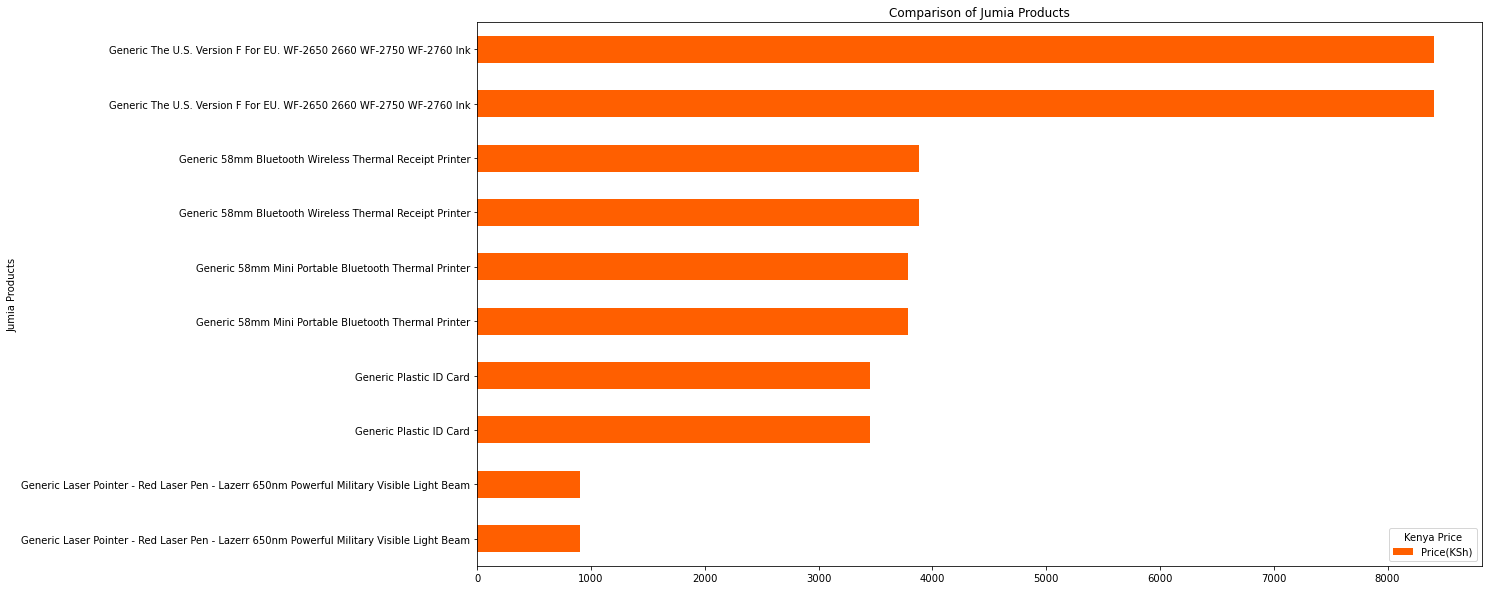

In [34]:
import matplotlib.pyplot as plt
d.set_index('Products').sort_values(by='Price(KSh)').head(10).plot(kind='barh',
                                                           xlabel='Jumia Products',
                                                           title='Comparison of Jumia Products',
                                                           figsize=(18,10),
                                                           color='#ff5f00'
                                                            )
plt.legend(loc='best',title='Kenya Price');

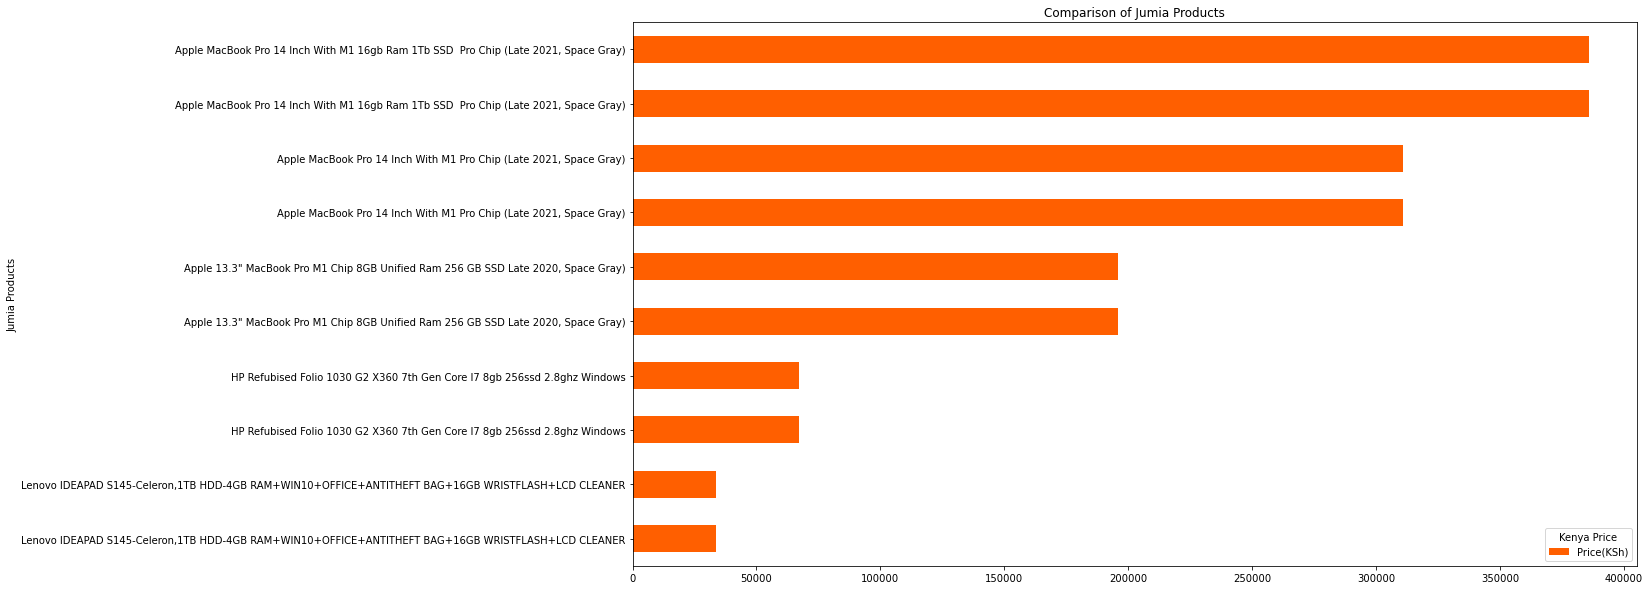

In [35]:
import matplotlib.pyplot as plt
d.set_index('Products').sort_values(by='Price(KSh)').tail(10).plot(kind='barh',
                                                           xlabel='Jumia Products',
                                                           title='Comparison of Jumia Products',
                                                           figsize=(18,10),
                                                           color='#ff5f00'
                                                            )
plt.legend(loc='best',title='Kenya Price');